# Predicting Nutrient Gaps: Amini Soil Random Forest (Extensive Feature Engineering)

## **Introduction**

Welcome! This notebook will guide you through the process of building a machine learning model to predict nutrient gaps in soil.
We'll cover data loading, exploratory data analysis (EDA), feature preprocessing, model training, evaluation, and submission.

### **What You Will Learn**

- How to load and inspect data in Python using `pandas`
- How to explore data with visualizations using `matplotlib` and `seaborn`
- How to preprocess data for machine learning
- How to train a simple machine learning model using `scikit-learn`
- How to evaluate model performance
- How to generate and save predictions for submission

#### **Additional Reading for Beginners**

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Visualization Guide](https://seaborn.pydata.org/tutorial.html)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Let's get started! 🚀


## **Step 1: Load the Data**

We begin by loading the training and test datasets using `pandas`. The dataset consists of different features, with `pH` as the target variable in the training data.

### **Tips for Beginners**

- The `train.csv` file contains both the features and the target variable (`pH`).
- The `test.csv` file contains only the features (we need to predict `pH` for these).
- Always check the first few rows of the dataset using `.head()` to understand its structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import *
from sklearn.linear_model import LinearRegression
from lightgbm import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

## **Step 2: Exploratory Data Analysis (EDA)**

EDA helps us understand the data better before building a model.

### **Why is EDA Important?**
- It reveals patterns, trends, and potential issues in the data.
- It helps us decide which preprocessing steps are needed.
- It allows us to visualize relationships between variables.

### **Tips for Beginners**
- Always check for missing values and outliers.
- Use histograms to see the distribution of numerical features.
- Correlation heatmaps can help identify which features are most relevant.

Let's explore the data! 📊


In [3]:
# Load datasets
train_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Train.csv')
test_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Test.csv')
train_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Train.csv')
test_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Test.csv')
sample_submission = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/SampleSubmission.csv')

In [4]:
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0.744845,46.00,9.25,8.289246,0.020588,0.003885,1.46,3500,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,0.531739,22.00,17.022963,18.030899,0.03090,0.030000,43.281063,19.539835,1325.000122,2413.000244,631.999939,1961.000000,1044,27.230274,255.713043,6.625,0.708708,43.75,10.00,8.666523,0.016913,0.001714,1.48,2300,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,0.039202,14.75,23.103102,11.000000,0.00000,0.155324,45.654484,18.690720,1628.999512,2685.999023,732.999939,2427.000000,1055,20.434782,86.220909,6.700,0.634153,49.25,7.00,15.139549,0.019791,0.000000,1.43,940,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [5]:
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,0.038132,44.75,1.581062,17.099701,0.0997,0.03,40.674942,18.333445,991.000061,2484.000488,486.000031,1413.000244,817,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,0.040187,53.00,5.700576,25.129000,0.1290,0.03,41.836205,18.762138,819.000000,2257.000000,412.000000,1199.000122,759,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,0.068795,49.00,6.823292,26.117001,0.1170,0.03,42.058319,18.344410,965.000000,2378.000244,444.999969,1324.000000,769,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,0.089460,46.25,2.235947,20.136999,0.1370,0.03,40.605465,18.348402,909.000122,2477.000000,471.000061,1300.000122,742,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,0.066978,44.75,9.803858,28.024500,0.0245,0.03,40.671932,18.954443,1057.999390,2782.997559,461.999969,1292.999878,881,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [6]:
train_gap_df

,Nutrient,Required,Available,Gap,PID
0,N,100.00,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.00,0.9928,39.0072,ID_I5RGjv
2,K,52.00,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.00,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.00,6745.2000,-6737.2000,ID_I5RGjv
...,...,...,...,...,...
85179,Fe,0.80,248.6400,-247.8400,ID_IGMXgo
85180,Mn,0.40,586.0800,-585.6800,ID_IGMXgo
85181,Zn,0.40,10.4340,-10.0340,ID_IGMXgo
85182,Cu,0.20,5.1060,-4.9060,ID_IGMXgo


In [7]:
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [8]:
test_gap_df.head()

,Nutrient,Required,PID,BulkDensity
0,N,100.0,ID_NGS9Bx,1.2
1,P,40.0,ID_NGS9Bx,1.2
2,K,52.0,ID_NGS9Bx,1.2
3,Ca,12.0,ID_NGS9Bx,1.2
4,Mg,8.0,ID_NGS9Bx,1.2


In [9]:
sample_submission.head()

,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


## 📊 Aggregating Site-Level Statistics in a DataFrame
This script computes aggregated statistics (min, max, mean, median) for numeric features in a DataFrame grouped by the site column. The results are merged back into the original test_df.

In [10]:
# --- Step 1: Columns to exclude from aggregation ---
exclude_cols = ['PID', 'lon', 'lat', 'site']
agg_cols = [col for col in test_df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(test_df[col])]

# --- Step 2: Group by 'site' and compute stats ---
site_stats = test_df.groupby('site')[agg_cols].agg(['min', 'max', 'mean', 'median'])

# Flatten multi-level column names: e.g., pH_mean, pH_std
site_stats.columns = ['_'.join(col).strip() for col in site_stats.columns.values]

# Reset index to merge back with original dataframe
site_stats.reset_index(inplace=True)

# --- Step 3: Merge back to test_df and test_df ---
test_df = test_df.merge(site_stats, on='site', how='left')

In [11]:
# --- Step 1: Columns to exclude from aggregation ---
exclude_cols = ['PID', 'lon', 'lat', 'site', 'N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']
agg_cols = [col for col in train_df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(train_df[col])]

# --- Step 2: Group by 'site' and compute stats ---
site_stats = train_df.groupby('site')[agg_cols].agg(['min', 'max', 'mean', 'median'])

# Flatten multi-level column names: e.g., pH_mean, pH_std
site_stats.columns = ['_'.join(col).strip() for col in site_stats.columns.values]

# Reset index to merge back with original dataframe
site_stats.reset_index(inplace=True)

# --- Step 3: Merge back to train_df and train_df ---
train_df = train_df.merge(site_stats, on='site', how='left')

## **Step 3: Feature Selection & Preprocessing**

Feature selection and preprocessing are essential to ensure that the data is suitable for training a model.

### **Why is Preprocessing Important?**
- It standardizes data for better model performance.
- It handles missing values and categorical variables.
- It ensures the model learns patterns effectively.

### **Key Steps in Preprocessing**
- **Scaling**: Standardizes numerical features to a common range.
- **Feature Selection**: Choosing relevant features for the model.

### **Additional Reading**
- [Feature Scaling in Machine Learning](https://scikit-learn.org/stable/modules/preprocessing.html)


In [12]:
# Display basic info
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Columns: 160 entries, site to BulkDensity_median
dtypes: float64(136), int64(22), object(2)
memory usage: 9.5+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Columns: 149 entries, site to BulkDensity_median
dtypes: float64(129), int64(18), object(2)
memory usage: 2.7+ MB
None


In [13]:
train_df

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B,pH_min,pH_max,pH_mean,pH_median,alb_min,alb_max,alb_mean,alb_median,bio1_min,bio1_max,bio1_mean,bio1_median,bio12_min,bio12_max,bio12_mean,bio12_median,bio15_min,bio15_max,bio15_mean,bio15_median,bio7_min,bio7_max,bio7_mean,bio7_median,bp_min,bp_max,bp_mean,bp_median,cec20_min,cec20_max,cec20_mean,cec20_median,dows_min,dows_max,dows_mean,dows_median,ecec20_min,ecec20_max,ecec20_mean,ecec20_median,hp20_min,hp20_max,hp20_mean,hp20_median,ls_min,ls_max,ls_mean,ls_median,lstd_min,lstd_max,lstd_mean,lstd_median,lstn_min,lstn_max,lstn_mean,lstn_median,mb1_min,mb1_max,mb1_mean,mb1_median,mb2_min,mb2_max,mb2_mean,mb2_median,mb3_min,mb3_max,mb3_mean,mb3_median,mb7_min,mb7_max,mb7_mean,mb7_median,mdem_min,mdem_max,mdem_mean,mdem_median,para_min,para_max,para_mean,para_median,parv_min,parv_max,parv_mean,parv_median,ph20_min,ph20_max,ph20_mean,ph20_median,slope_min,slope_max,slope_mean,slope_median,snd20_min,snd20_max,snd20_mean,snd20_median,soc20_min,soc20_max,soc20_mean,soc20_median,tim_min,tim_max,tim_mean,tim_median,wp_min,wp_max,wp_mean,wp_median,xhp20_min,xhp20_max,xhp20_mean,xhp20_median,BulkDensity_min,BulkDensity_max,BulkDensity_mean,BulkDensity_median
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24,6.40,7.75,7.185000,7.195,132,176,156.875000,167.0,247,249,248.000000,248.0,912,1018,955.250000,950.0,108,110,108.375000,108.0,190,191,190.250000,190.0,0.058747,0.707932,0.353755,0.373809,22.00,33.25,29.468750,30.500,21.424564,23.590298,22.401946,22.366915,11.00779,25.231001,18.853312,17.048150,0.00000,0.2390,0.103311,0.04815,0.03,0.094082,0.045196,0.03,44.240669,46.608509,45.435076,45.488026,18.465033,19.427130,18.949129,18.940107,864.000427,2006.000488,1320.500130,1405.500061,1645.000732,3182.000732,2351.375214,2576.499878,464.000092,855.000244,599.500076,612.500031,1306.000122,2363.000732,1826.625031,1972.999939,1081,1097,1089.750000,1089.5,19.412239,24.103060,22.205113,22.318841,110.758514,243.023132,167.595243,135.761497,6.975,7.425,7.146875,7.050,0.447508,2.035072,1.009586,0.761513,31.50,43.00,37.843750,40.000,8.00,11.75,9.468750,9.125,7.962668,13.112203,10.245096,10.072555,0.016538,0.019393,0.017339,0.017097,0.000000,0.010284,0.004563,0.002838,1.38,1.47,1.447500,1.460
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10,6.26,8.00,7.220000,7.100,145,196,173.428571,174.0,249,252,250.285714,250.0,1008,1149,1086.857143,1109.0,110,113,111.428571,111.0,191,191,191.000000,191.0,0.061296,0.707011,0.371490,0.362439,14.25,34.00,22.892857,23.750,17.022963,23.510744,19.944179,19.404194,14.02350,40.185001,21.082966,17.169001,0.00596,0.1850,0.082966,0.06240,0.03,0.110223,0.051956,0.03,42.409557,44.985626,43.842627,44.167717,18.270815,19.730261,19.220232,19.413284,966.999878,1642.000000,1372.999930,1382.999634,2046.999756,2910.000000,2557.714355,2531.999756,473.000061,772.999939,641.857143,631.999939,1309.000122,2107.999756,1842.285836,1961.000000,1022,1077,1051.857143,1049.0,18.869566,32.342995,25.213711,24.719807,109.835541,417.613312,234.243402,214.385269,6.625,7.025,6.782143,6.725,0.162065,2.499955,0.886719,0.708708,27.25,46.00,39.678571,43.500,8.00,10.75,9.321429,9.250,7.365927,12.241879,9.893438,8.666523,0.016913,0.020588,0.018852,0.018339,0.000372,0.009843,0.003725,0.003885,1.36,1.52,1.454286,1.480

In [14]:
train_df.isnull().sum()

site                  0
PID                   0
lon                   0
lat                   0
pH                    0
                     ..
xhp20_median          0
BulkDensity_min       0
BulkDensity_max       0
BulkDensity_mean      0
BulkDensity_median    0
Length: 160, dtype: int64

### prompt: input missing values in train_df and test_df with the mean, only do it for columns that have missing values

In [15]:
# Fill missing values with the mean for columns with missing values in train_df
for column in train_df.columns:
  if train_df[column].isnull().any():
    train_df[column].fillna(train_df[column].mean(), inplace=True)

# Fill missing values with the mean for columns with missing values in test_df
for column in test_df.columns:
  if test_df[column].isnull().any():
    test_df[column].fillna(test_df[column].mean(), inplace=True)

## **Step 4: Model Training**

Now, we train a Random Forest model. A **Random Forest** is an ensemble learning method that combines multiple decision trees to improve accuracy.

### **Tips for Beginners**
- More trees (`n_estimators`) generally improve accuracy but increase computation time.
- Setting a `random_state` ensures reproducibility of results.
- Always evaluate the model on a validation set before making predictions.

### **Additional Reading**
- [Random Forest Regressor in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


## **Step 5: Model Evaluation**

After training the model, we evaluate it using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

### **Why Evaluate a Model?**
- It helps understand how well the model generalizes to unseen data.
- Lower error values indicate a better model.

### **Tips for Beginners**
- Use multiple metrics (e.g., MAE, RMSE) to get a comprehensive view of model performance.
- If errors are high, consider trying different algorithms or tuning hyperparameters.

### **Additional Reading**
- [Evaluation Metrics for Regression](https://scikit-learn.org/stable/modules/model_evaluation.html)


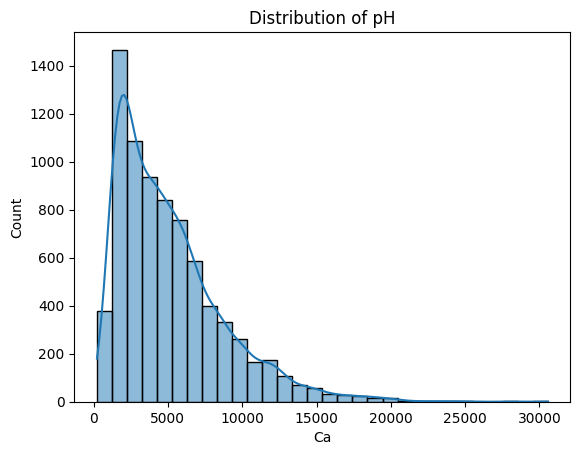

In [16]:
# Basic EDA
sns.histplot(train_df['Ca'], bins=30, kde=True)
plt.title('Distribution of pH')
plt.show()

# Step 6: Let's model ⏳

In [17]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

In [18]:
train_df

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B,pH_min,pH_max,pH_mean,pH_median,alb_min,alb_max,alb_mean,alb_median,bio1_min,bio1_max,bio1_mean,bio1_median,bio12_min,bio12_max,bio12_mean,bio12_median,bio15_min,bio15_max,bio15_mean,bio15_median,bio7_min,bio7_max,bio7_mean,bio7_median,bp_min,bp_max,bp_mean,bp_median,cec20_min,cec20_max,cec20_mean,cec20_median,dows_min,dows_max,dows_mean,dows_median,ecec20_min,ecec20_max,ecec20_mean,ecec20_median,hp20_min,hp20_max,hp20_mean,hp20_median,ls_min,ls_max,ls_mean,ls_median,lstd_min,lstd_max,lstd_mean,lstd_median,lstn_min,lstn_max,lstn_mean,lstn_median,mb1_min,mb1_max,mb1_mean,mb1_median,mb2_min,mb2_max,mb2_mean,mb2_median,mb3_min,mb3_max,mb3_mean,mb3_median,mb7_min,mb7_max,mb7_mean,mb7_median,mdem_min,mdem_max,mdem_mean,mdem_median,para_min,para_max,para_mean,para_median,parv_min,parv_max,parv_mean,parv_median,ph20_min,ph20_max,ph20_mean,ph20_median,slope_min,slope_max,slope_mean,slope_median,snd20_min,snd20_max,snd20_mean,snd20_median,soc20_min,soc20_max,soc20_mean,soc20_median,tim_min,tim_max,tim_mean,tim_median,wp_min,wp_max,wp_mean,wp_median,xhp20_min,xhp20_max,xhp20_mean,xhp20_median,BulkDensity_min,BulkDensity_max,BulkDensity_mean,BulkDensity_median
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.016853,0.000708,1.46,1300,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24,6.40,7.75,7.185000,7.195,132,176,156.875000,167.0,247,249,248.000000,248.0,912,1018,955.250000,950.0,108,110,108.375000,108.0,190,191,190.250000,190.0,0.058747,0.707932,0.353755,0.373809,22.00,33.25,29.468750,30.500,21.424564,23.590298,22.401946,22.366915,11.00779,25.231001,18.853312,17.048150,0.00000,0.2390,0.103311,0.04815,0.03,0.094082,0.045196,0.03,44.240669,46.608509,45.435076,45.488026,18.465033,19.427130,18.949129,18.940107,864.000427,2006.000488,1320.500130,1405.500061,1645.000732,3182.000732,2351.375214,2576.499878,464.000092,855.000244,599.500076,612.500031,1306.000122,2363.000732,1826.625031,1972.999939,1081,1097,1089.750000,1089.5,19.412239,24.103060,22.205113,22.318841,110.758514,243.023132,167.595243,135.761497,6.975,7.425,7.146875,7.050,0.447508,2.035072,1.009586,0.761513,31.50,43.00,37.843750,40.000,8.00,11.75,9.468750,9.125,7.962668,13.112203,10.245096,10.072555,0.016538,0.019393,0.017339,0.017097,0.000000,0.010284,0.004563,0.002838,1.38,1.47,1.447500,1.460
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.018321,0.001676,1.52,1400,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10,6.26,8.00,7.220000,7.100,145,196,173.428571,174.0,249,252,250.285714,250.0,1008,1149,1086.857143,1109.0,110,113,111.428571,111.0,191,191,191.000000,191.0,0.061296,0.707011,0.371490,0.362439,14.25,34.00,22.892857,23.750,17.022963,23.510744,19.944179,19.404194,14.02350,40.185001,21.082966,17.169001,0.00596,0.1850,0.082966,0.06240,0.03,0.110223,0.051956,0.03,42.409557,44.985626,43.842627,44.167717,18.270815,19.730261,19.220232,19.413284,966.999878,1642.000000,1372.999930,1382.999634,2046.999756,2910.000000,2557.714355,2531.999756,473.000061,772.999939,641.857143,631.999939,1309.000122,2107.999756,1842.285836,1961.000000,1022,1077,1051.857143,1049.0,18.869566,32.342995,25.213711,24.719807,109.835541,417.613312,234.243402,214.385269,6.625,7.025,6.782143,6.725,0.162065,2.499955,0.886719,0.708708,27.25,46.00,39.678571,43.500,8.00,10.75,9.321429,9.250,7.365927,12.241879,9.893438,8.666523,0.016913,0.020588,0.018852,0.018339,0.000372,0.009843,0.003725,0.003885,1.36,1.52,1.454286,1.480

In [19]:
# Feature selection
X = train_df.drop(columns=target_columns + ['PID','wp'])
y = train_df[target_columns]
X_test = test_df.drop(columns=['PID','wp'])

In [20]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (assumes object or category types)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Label Encoding to each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    # Fit on the combined data to handle unseen categories in test set
    combined_data = pd.concat([X[col], X_test[col]], axis=0).astype(str)
    le.fit(combined_data)
    
    X[col] = le.transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    
    label_encoders[col] = le  # Store encoder if you need to inverse transform or reuse

In [21]:
X

,site,lon,lat,pH,alb,bio1,bio12,bio15,bio7,bp,cec20,dows,ecec20,hp20,ls,lstd,lstn,mb1,mb2,mb3,mb7,mdem,para,parv,ph20,slope,snd20,soc20,tim,xhp20,BulkDensity,pH_min,pH_max,pH_mean,pH_median,alb_min,alb_max,alb_mean,alb_median,bio1_min,bio1_max,bio1_mean,bio1_median,bio12_min,bio12_max,bio12_mean,bio12_median,bio15_min,bio15_max,bio15_mean,bio15_median,bio7_min,bio7_max,bio7_mean,bio7_median,bp_min,bp_max,bp_mean,bp_median,cec20_min,cec20_max,cec20_mean,cec20_median,dows_min,dows_max,dows_mean,dows_median,ecec20_min,ecec20_max,ecec20_mean,ecec20_median,hp20_min,hp20_max,hp20_mean,hp20_median,ls_min,ls_max,ls_mean,ls_median,lstd_min,lstd_max,lstd_mean,lstd_median,lstn_min,lstn_max,lstn_mean,lstn_median,mb1_min,mb1_max,mb1_mean,mb1_median,mb2_min,mb2_max,mb2_mean,mb2_median,mb3_min,mb3_max,mb3_mean,mb3_median,mb7_min,mb7_max,mb7_mean,mb7_median,mdem_min,mdem_max,mdem_mean,mdem_median,para_min,para_max,para_mean,para_median,parv_min,parv_max,parv_mean,parv_median,ph20_min,ph20_max,ph20_mean,ph20_median,slope_min,slope_max,slope_mean,slope_median,snd20_min,snd20_max,snd20_mean,snd20_median,soc20_min,soc20_max,soc20_mean,soc20_median,tim_min,tim_max,tim_mean,tim_median,wp_min,wp_max,wp_mean,wp_median,xhp20_min,xhp20_max,xhp20_mean,xhp20_median,BulkDensity_min,BulkDensity_max,BulkDensity_mean,BulkDensity_median
0,674,70.603761,46.173798,7.75,176,248,920,108,190,0.581573,22.00,21.500278,11.007790,0.00779,0.030000,44.908058,18.967873,2006.000488,3182.000732,855.000244,2363.000732,1097,20.544283,126.835480,7.050,1.962921,39.00,9.75,7.962668,0.000708,1.46,6.40,7.75,7.185000,7.195,132,176,156.875000,167.0,247,249,248.000000,248.0,912,1018,955.250000,950.0,108,110,108.375000,108.0,190,191,190.250000,190.0,0.058747,0.707932,0.353755,0.373809,22.00,33.25,29.468750,30.500,21.424564,23.590298,22.401946,22.366915,11.00779,25.231001,18.853312,17.048150,0.00000,0.2390,0.103311,0.04815,0.03,0.094082,0.045196,0.03,44.240669,46.608509,45.435076,45.488026,18.465033,19.427130,18.949129,18.940107,864.000427,2006.000488,1320.500130,1405.500061,1645.000732,3182.000732,2351.375214,2576.499878,464.000092,855.000244,599.500076,612.500031,1306.000122,2363.000732,1826.625031,1972.999939,1081,1097,1089.750000,1089.5,19.412239,24.103060,22.205113,22.318841,110.758514,243.023132,167.595243,135.761497,6.975,7.425,7.146875,7.050,0.447508,2.035072,1.009586,0.761513,31.50,43.00,37.843750,40.000,8.00,11.75,9.468750,9.125,7.962668,13.112203,10.245096,10.072555,0.016538,0.019393,0.017339,0.017097,0.000000,0.010284,0.004563,0.002838,1.38,1.47,1.447500,1.460
1,921,70.590479,46.078924,7.10,181,250,1080,113,191,0.707011,24.00,21.389599,14.023500,0.02350,0.030000,44.985626,19.730261,1637.000122,2839.000488,707.000061,2039.000488,1060,18.869566,109.835541,6.975,0.162065,40.00,8.00,8.439500,0.001676,1.52,6.26,8.00,7.220000,7.100,145,196,173.428571,174.0,249,252,250.285714,250.0,1008,1149,1086.857143,1109.0,110,113,111.428571,111.0,191,191,191.000000,191.0,0.061296,0.707011,0.371490,0.362439,14.25,34.00,22.892857,23.750,17.022963,23.510744,19.944179,19.404194,14.02350,40.185001,21.082966,17.169001,0.00596,0.1850,0.082966,0.06240,0.03,0.110223,0.051956,0.03,42.409557,44.985626,43.842627,44.167717,18.270815,19.730261,19.220232,19.413284,966.999878,1642.000000,1372.999930,1382.999634,2046.999756,2910.000000,2557.714355,2531.999756,473.000061,772.999939,641.857143,631.999939,1309.000122,2107.999756,1842.285836,1961.000000,1022,1077,1051.857143,1049.0,18.869566,32.342995,25.213711,24.719807,109.835541,417.613312,234.243402,214.385269,6.625,7.025,6.782143,6.725,0.162065,2.499955,0.886719,0.708708,27.25,46.00,39.678571,43.500,8.00,10.75,9.321429,9.250,7.365927,12.241879,9.893438,8.666523,0.016913,0.020588,0.018852,0.018339,0.000372,0.009843,0.003725,0.003885,1.36,1.52,1.454286,1.480
2,921,70.582553,46.048820,6.95,188,250,1109,111,191,0.362439,15.25,18.900057,16.062401,0.06240,0.030000,44.167717,19.413284,1639.999634,2903.000000,758.999939,2003.999878,1074,24.719807,214.385269,6.725,0

In [22]:
def RMSE(y_pred, y_true):
    return np.sqrt( np.mean((y_pred-y_true)**2) )

In [23]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50,
                                                   random_state=42, verbose=0))
model.fit(X_train, y_train)

# Predict on validation set
predictions = model.predict(X_test)
y_pred = model.predict(X_val)

print(RMSE(y_pred, y_val))

493.99863394983544


         Feature  Mean Importance   Std Dev
3             pH         0.162824  0.173416
2            lat         0.047083  0.063709
1            lon         0.034336  0.018865
6          bio12         0.033948  0.065177
18           mb2         0.033810  0.038596
26         snd20         0.022094  0.017295
12        ecec20         0.021416  0.027119
34     pH_median         0.019855  0.047487
20           mb7         0.018920  0.011360
9             bp         0.018653  0.016882
15          lstd         0.017816  0.017263
17           mb1         0.016353  0.011335
11          dows         0.015682  0.009626
23          parv         0.015556  0.007923
28           tim         0.015534  0.007728
25         slope         0.015230  0.007972
21          mdem         0.014351  0.013915
7          bio15         0.014298  0.011782
22          para         0.014248  0.007821
27         soc20         0.014206  0.010962
104     mdem_max         0.013402  0.032946
16          lstn         0.01337

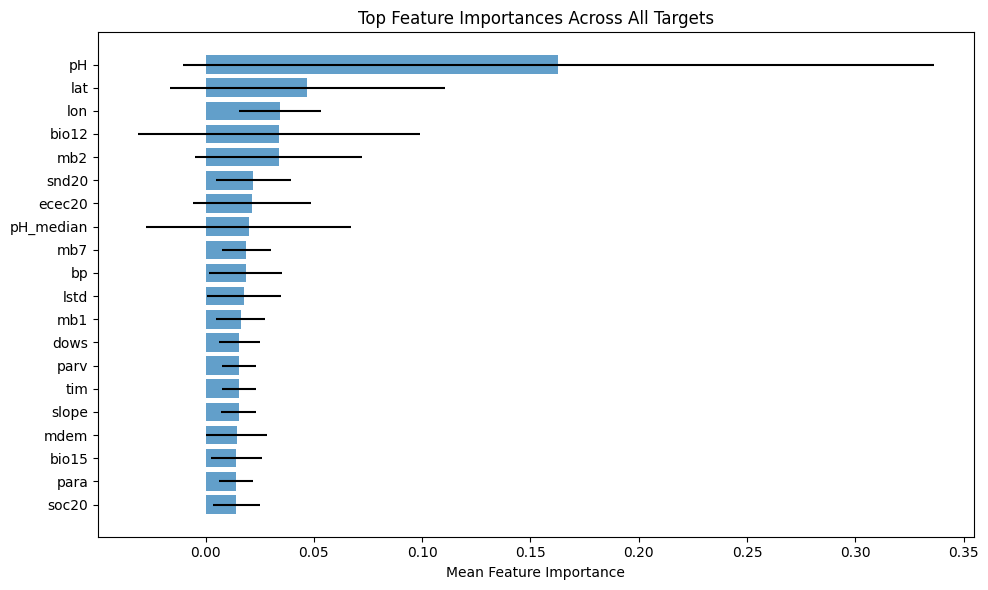

In [24]:
# Extract feature importances from each individual regressor
importances = np.array([est.feature_importances_ for est in model.estimators_])

# Aggregate: mean importance across all targets
mean_importances = importances.mean(axis=0)

# Optional: standard deviation to show variability
std_importances = importances.std(axis=0)

# Create a DataFrame for better readability
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Importance': mean_importances,
    'Std Dev': std_importances
}).sort_values(by='Mean Importance', ascending=False)

# Print top features
print(importance_df.head(33))

# Optional: Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Mean Importance'][:top_n][::-1],
         xerr=importance_df['Std Dev'][:top_n][::-1], alpha=0.7)
plt.xlabel("Mean Feature Importance")
plt.title("Top Feature Importances Across All Targets")
plt.tight_layout()
plt.show()

## **Step 7: Generate Predictions & Submission File**

Finally, we use our trained model to generate predictions for the test dataset and save them in a CSV file.

### **Why Save Predictions?**
- Predictions are needed for submission to competitions or practical applications.
- The submission format must match the required structure.

### **Tips for Beginners**
- Ensure the column names match the required format.
- Use `to_csv(index=False)` to avoid adding unnecessary row indices.




In [25]:
test_predictions = model.predict(X_test)

In [26]:
# Split the predictions into separate columns
N_pred =  test_predictions[:, 0]  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3]  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B


In [27]:
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()

,PID,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,ID_NGS9Bx,1695.0,10.9282,187.12,5385.56,1557.22,9.6950,119.430,154.30,1.7740,4.4734,0.1842
1,ID_YdVKXw,1131.8,7.3576,183.12,6503.02,2431.90,9.9818,110.984,132.18,2.4428,4.4120,0.2220
2,ID_MZAlfE,1994.4,9.0858,157.18,5413.34,1776.10,10.2742,118.990,163.58,5.0418,4.5004,0.1942
3,ID_GwCCMN,1667.0,6.5348,229.34,5888.54,1786.00,9.5910,144.650,148.16,1.7316,4.4466,0.2490
4,ID_K8sowf,1695.2,6.2746,201.42,5693.02,1521.10,8.8478,114.864,138.66,2.0062,4.2362,0.2020


In [28]:
# prompt: turn submission into a 3 column file that has the column PID, Nutrient, Value

submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

,PID,Nutrient,Available_Nutrients_in_ppm
19869,ID_002W8m,Zn,6.4706
15033,ID_002W8m,Fe,161.8540
2943,ID_002W8m,P,11.4212
24705,ID_002W8m,B,0.5244
525,ID_002W8m,N,2192.2000


# Calculate the nutrient gaps

Transform your predicted ppm values to available nutrients (kg/ha) to determine the nutrient gaps.

We are determining the nutrients needed for Maize crops to yeild 4 tons/ha at a depth of 20cm.

Available nutrients are calculated by

`Available (kg/ha) = ppm × soil depth (cm) × bulk density (g/cm³) × 0.1`

In [29]:
# prompt: merge test_gap_df with submission_melted on PID and Nutrient
nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')


In [30]:
nutrient_df 

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm
0,N,100.00,ID_NGS9Bx,1.20,1695.0000
1,P,40.00,ID_NGS9Bx,1.20,10.9282
2,K,52.00,ID_NGS9Bx,1.20,187.1200
3,Ca,12.00,ID_NGS9Bx,1.20,5385.5600
4,Mg,8.00,ID_NGS9Bx,1.20,1557.2200
...,...,...,...,...,...
26593,Fe,0.80,ID_oMn2Yb,1.14,183.9740
26594,Mn,0.40,ID_oMn2Yb,1.14,191.2140
26595,Zn,0.40,ID_oMn2Yb,1.14,8.6270
26596,Cu,0.20,ID_oMn2Yb,1.14,2.2864


In [31]:
soil_depth = 20  # cm

# Calculate the Available_Nutrients_in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_in_ppm']
                                               * soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [32]:
nutrient_df.head()

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm,Available_Nutrients_in_kg_ha
0,N,100.0,ID_NGS9Bx,1.2,1695.0000,4068.00000
1,P,40.0,ID_NGS9Bx,1.2,10.9282,26.22768
2,K,52.0,ID_NGS9Bx,1.2,187.1200,449.08800
3,Ca,12.0,ID_NGS9Bx,1.2,5385.5600,12925.34400
4,Mg,8.0,ID_NGS9Bx,1.2,1557.2200,3737.32800


In [33]:
nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

In [34]:
nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
nutrient_df = nutrient_df[['ID', 'Gap']]
nutrient_df

,ID,Gap
0,ID_NGS9Bx_N,-3968.000000
1,ID_NGS9Bx_P,13.772320
2,ID_NGS9Bx_K,-397.088000
3,ID_NGS9Bx_Ca,-12913.344000
4,ID_NGS9Bx_Mg,-3729.328000
...,...,...
26593,ID_oMn2Yb_Fe,-418.660720
26594,ID_oMn2Yb_Mn,-435.567920
26595,ID_oMn2Yb_Zn,-19.269560
26596,ID_oMn2Yb_Cu,-5.012992


If a value is negative it means there is excess of that nutrient in the soil already and the farmer does not need to add any more. If the value is positive then the farmer needs to add those nutrients to the soil.

In [35]:
nutrient_df.to_csv('submission-rf_extensive_fe.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


So apparently this is just the same as the starter notebook. The second notebook has the same configurations but does not have such extensive feature engineering (it is indeed like the starter notebook 😜.

Let's move to the next notebook!